In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
from NenuFAR.utils import *
from blimpy_yuhong.blimpy.guppi import GuppiRaw as GuppiRaw_dev
from blimpy.guppi import GuppiRaw

#http://breakthroughinitiatives.org/opendatasearch
#smallest voyager raw file (33.1 mb)
smallerraw='../data/blc0_2bit_guppi_57396_VOYAGER1_0006.0013.raw'
#small voyager raw file (66.1 mb)
smallraw='../data/blc1_2bit_guppi_57396_VOYAGER1_0006.0013.raw'
#voyager raw file (~4gb)
bigraw='../data/blc2_2bit_guppi_57396_VOYAGER1_0006.0012.raw'
#M31 raw file (66.1 mb)
M31raw='../data/blc1_2bit_guppi_57398_MESSIER031_0019.0013.raw'
#large raw file (~16 gb)
DIAGraw = "../data/blc04_guppi_57899_53848_DIAG_HIP19849_0002.0000.raw"

In [2]:
gr = GuppiRaw_dev(smallerraw)

In [3]:
with gr as file:
    header, pol0, pol1 = file.read_next_data_block_int8()

(516608, 2)


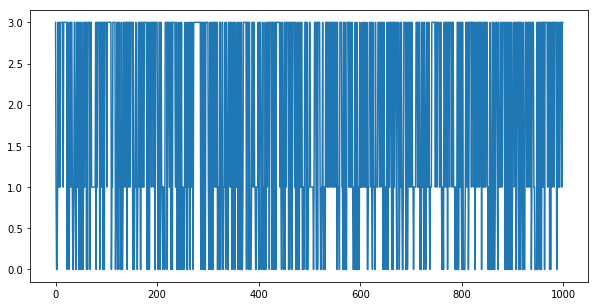

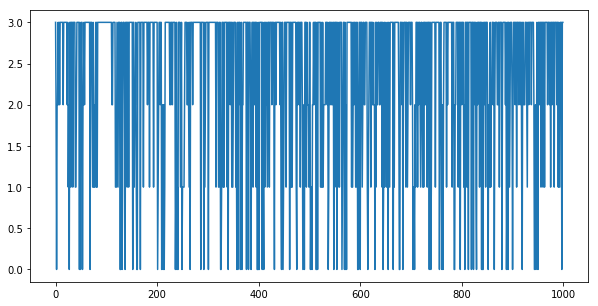

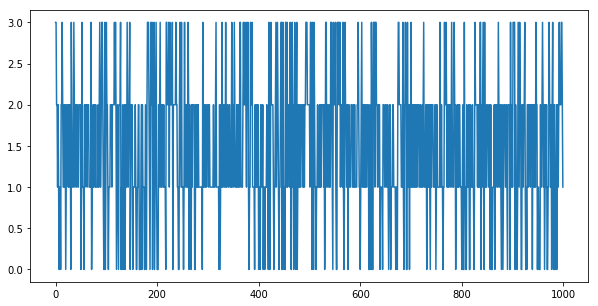

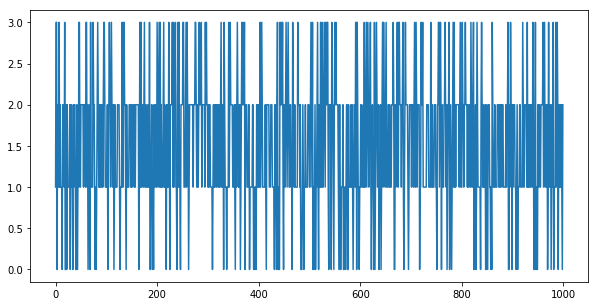

In [4]:
print(pol0[0].shape)

channel_index = 3

plt.figure(figsize=(10, 5))
plt.plot(pol0[channel_index][0:1000,0])
plt.figure(figsize=(10, 5))
plt.plot(pol0[channel_index][0:1000,1])

plt.figure(figsize=(10, 5))
plt.plot(pol1[channel_index][0:1000,0])
plt.figure(figsize=(10, 5))
plt.plot(pol1[channel_index][0:1000,1])

In [5]:
#00011011 -> 00 01 10 11
data = np.array([27], dtype=np.int8)
tmp = data.astype(np.uint32)
tmp = (tmp | (tmp << 12)) & 0xF000F
tmp = (tmp | (tmp << 6)) & 0x3030303
tmp = tmp.byteswap()
tmp = tmp.view('uint8')
tmp

array([0, 1, 2, 3], dtype=uint8)

In [6]:
d = {0: 3.3358750, 
     1: 1, 
     2: -1, 
     3: -3.3358750}


def map_values(d, map_dict):
    tmp = np.array(d, dtype="float32")
    for k, v in map_dict.items():
        tmp[d==k] = v
    return tmp

In [7]:
pol0_mapped = map_values(pol0, d)
pol1_mapped = map_values(pol1, d)

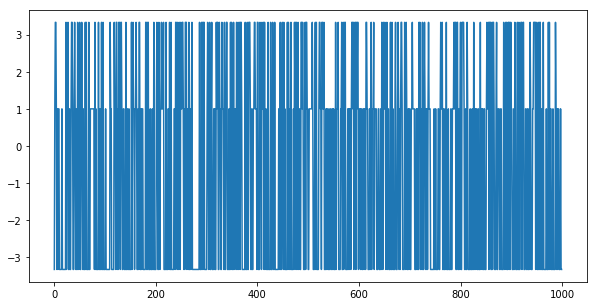

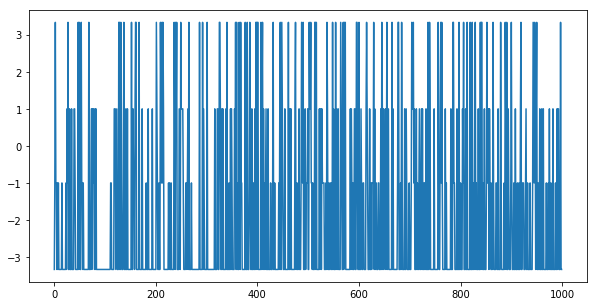

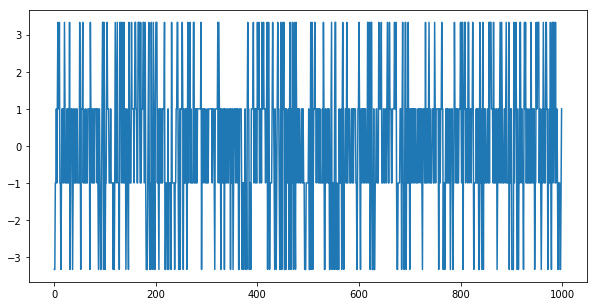

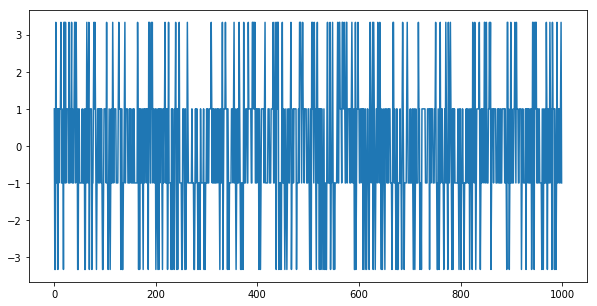

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(pol0_mapped[channel_index][0:1000,0])
plt.figure(figsize=(10, 5))
plt.plot(pol0_mapped[channel_index][0:1000,1])

plt.figure(figsize=(10, 5))
plt.plot(pol1_mapped[channel_index][0:1000,0])
plt.figure(figsize=(10, 5))
plt.plot(pol1_mapped[channel_index][0:1000,1])